In [1]:
import wandb
import numpy as np
from datasets import load_dataset, Dataset
from pixel_datasets.dataset_transformations import SyntheticDatasetTransform
from pixel_datasets.pixel_dataset_generator import PretrainingDataset
from jinja2 import Environment, FileSystemLoader, select_autoescape
from pixel_datasets.utils.utils import crop_image, concatenate_images, embed_image, plot_arrays


In [2]:
wandb.init(config="configs/pretraining_config.yaml", mode="disabled")

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [4]:
rng = np.random.RandomState(2)
text_dataset = load_dataset("wikipedia", "20220301.simple")

In [5]:
transform = SyntheticDatasetTransform(wandb.config, rng=rng)
train_dataset = PretrainingDataset(
        wandb.config, text_dataset["train"], transform, rng=rng
    )

INFO:root:randomizing dataset with worker id=0 and epoch=0
INFO:root:randomizing dataset with worker id=0 and epoch=1
INFO:root:randomizing dataset with worker id=0 and epoch=2


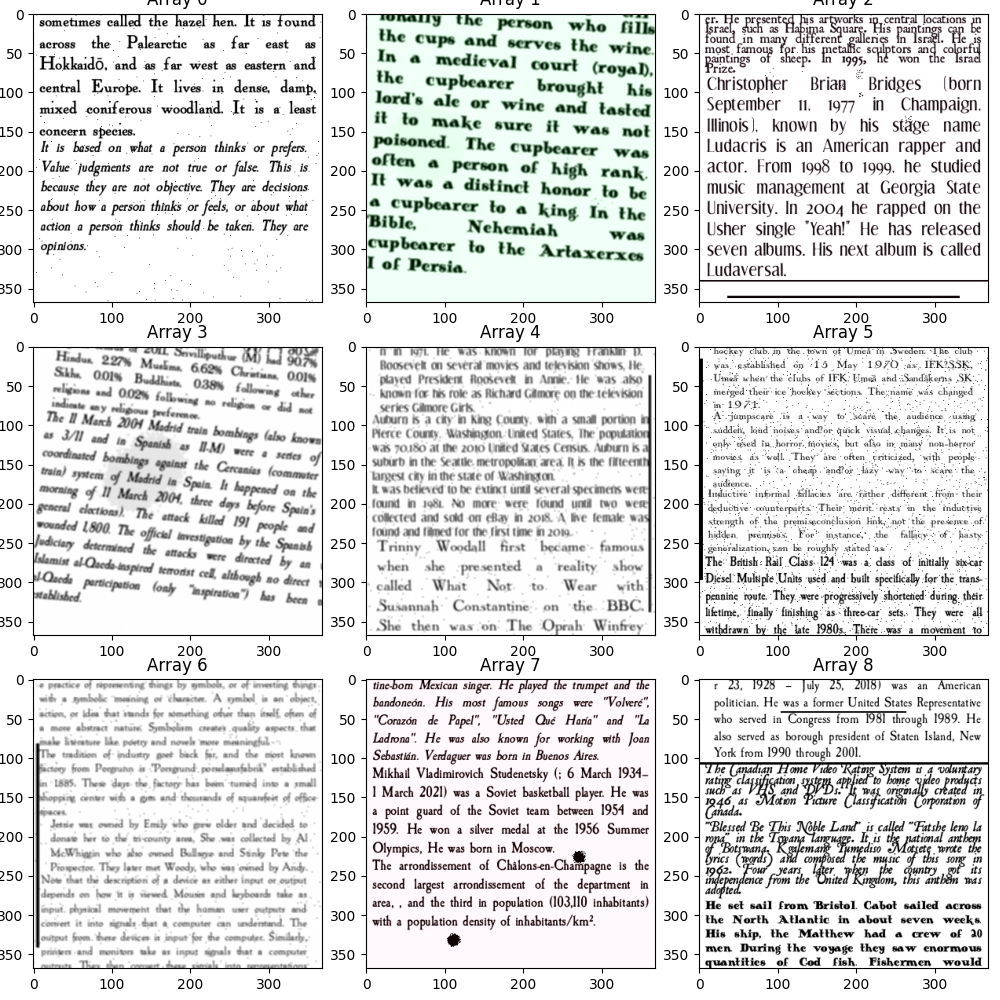

In [6]:
figures = []
for i in range(3):
    train_dataset.set_epoch(i)
    counter = 0
    for batch in train_dataset:
        if counter == 3:
            break
        im = batch["pixel_values"].numpy().astype("uint8").transpose(1, 2, 0)
        figures.append(im)
        counter += 1

im = plot_arrays(figures)
im